In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

# Load data
mcdonalds = pd.read_csv("mcdonalds.csv")

mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [2]:
mcdonalds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [3]:
mcdonalds.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [4]:
mcdonalds.duplicated().sum()

22

In [5]:
mcdonalds = mcdonalds.drop_duplicates(keep = 'first')

In [6]:
print(mcdonalds.shape)

(1431, 15)


In [7]:
print(mcdonalds.head(3))


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [8]:
mcdonalds['Like']= mcdonalds.Like.replace('I love it!+5','+5')
mcdonalds['Like']= mcdonalds.Like.replace('I hate it!-5','-5')

In [9]:
# Preprocess data

MD_x = mcdonalds.iloc[:, 0:11].values
MD_x = (MD_x == "Yes").astype(int)

column_names = mcdonalds.columns[0:11]
column_means = np.round(np.mean(MD_x, axis=0), 2)

result = pd.DataFrame({'Column': column_names, 'Mean': column_means})
print(result)

        Column  Mean
0        yummy  0.55
1   convenient  0.91
2        spicy  0.10
3    fattening  0.87
4       greasy  0.53
5         fast  0.90
6        cheap  0.60
7        tasty  0.64
8    expensive  0.36
9      healthy  0.20
10  disgusting  0.24


In [10]:
# Perform PCA

MD_pca = PCA()
MD_pca.fit(MD_x)

# Summary
print("Importance of components:")
print("Standard deviation", np.round(MD_pca.explained_variance_, 4))
print("Proportion of Variance", np.round(MD_pca.explained_variance_ratio_, 4))
print("Cumulative Proportion", np.round(np.cumsum(MD_pca.explained_variance_ratio_), 4))

Importance of components:
Standard deviation [0.5745 0.3681 0.255  0.1593 0.1147 0.0974 0.0851 0.0766 0.0714 0.0626
 0.0568]
Proportion of Variance [0.299  0.1916 0.1327 0.0829 0.0597 0.0507 0.0443 0.0399 0.0372 0.0326
 0.0296]
Cumulative Proportion [0.299  0.4906 0.6232 0.7061 0.7658 0.8165 0.8608 0.9007 0.9378 0.9704
 1.    ]


In [11]:
print("Standard deviations (1, .., p=11):")
print(np.round(MD_pca.singular_values_, 1))
print("Rotation (n x k) = (11 x 11):")
print(pd.DataFrame(np.round(MD_pca.components_, 2), columns=mcdonalds.columns[0:11]))


Standard deviations (1, .., p=11):
[28.7 22.9 19.1 15.1 12.8 11.8 11.  10.5 10.1  9.5  9. ]
Rotation (n x k) = (11 x 11):
    yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0   -0.47       -0.16  -0.01       0.12    0.30 -0.11  -0.34  -0.47   
1    0.37        0.02   0.02      -0.03   -0.06 -0.09  -0.61   0.31   
2   -0.30       -0.06  -0.04      -0.32   -0.80 -0.07  -0.16  -0.29   
3    0.05       -0.14   0.20      -0.35    0.25 -0.10   0.12  -0.01   
4   -0.31        0.28   0.07      -0.07    0.36  0.11  -0.13  -0.21   
5    0.17       -0.34  -0.35      -0.40    0.22 -0.60  -0.10  -0.08   
6   -0.28       -0.06   0.71      -0.39    0.04 -0.09  -0.04   0.36   
7    0.01       -0.11   0.38       0.59   -0.14 -0.63   0.14  -0.07   
8    0.57       -0.02   0.40      -0.16   -0.00  0.17   0.07  -0.64   
9   -0.11       -0.65  -0.08      -0.01    0.01  0.23   0.44   0.08   
10   0.04       -0.56   0.14       0.25    0.00  0.34  -0.48   0.02   

    expensive  healthy  d

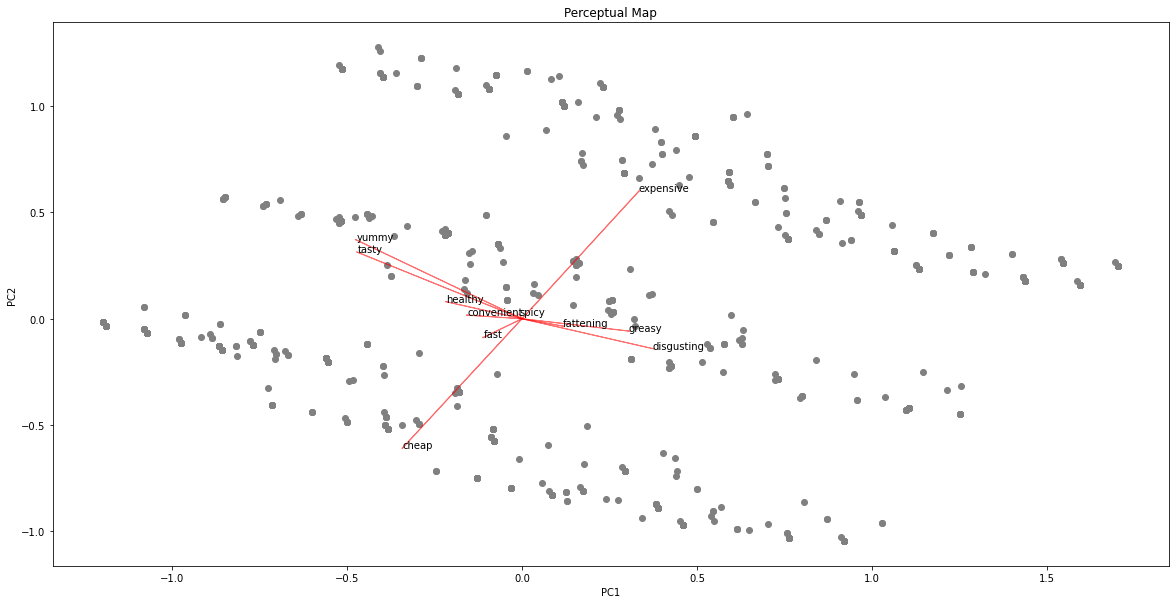

In [12]:
# Rotate and project data into principal component space
projected_data = MD_pca.transform(MD_x)

# Plot projected data
plt.figure(figsize=(20,10))
plt.scatter(projected_data[:, 0], projected_data[:, 1], color='grey')

# Add arrows for original segmentation variables
for i in range(len(column_names)):
    plt.arrow(0, 0, MD_pca.components_[0, i], MD_pca.components_[1, i], color='red', alpha=0.5)
    plt.text(MD_pca.components_[0, i], MD_pca.components_[1, i], column_names[i])


plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Perceptual Map")

plt.show()


In [13]:
# Perform K-means clustering

np.random.seed(1234)  # Set random seed

k_values = range(2, 9)  # Number of segments from 2 to 8
segmentations = []  # List to store the segmentations

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10)  # 10 random restarts
    kmeans.fit(MD_x)
    segmentations.append(kmeans.labels_)

# Relabel segment numbers for consistency
def relabel(segmentation):
    unique_labels = np.unique(segmentation)
    relabeled_segmentation = np.zeros_like(segmentation)
    for i, label in enumerate(unique_labels):
        relabeled_segmentation[segmentation == label] = i
    return relabeled_segmentation

relabeled_segmentations = [relabel(segmentation) for segmentation in segmentations]

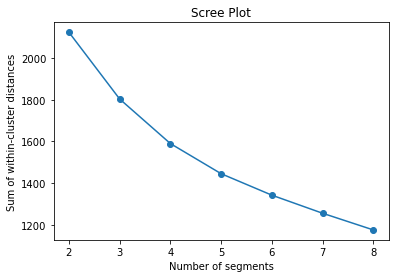

In [14]:

# Calculate within-cluster sum of squares for different numbers of segments
inertias = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(MD_x)
    inertias.append(kmeans.inertia_)

# Plot scree plot
plt.plot(range(2, 9), inertias, marker='o')
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Scree Plot")

plt.show()


In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
np.random.seed(1234)
silhouette_scores = []
cluster_labels = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    cluster_labels.append(kmeans.labels_)
    silhouette_scores.append(silhouette_score(MD_x, kmeans.labels_))

best_k = np.argmax(silhouette_scores)
macd_km28 = cluster_labels[best_k]

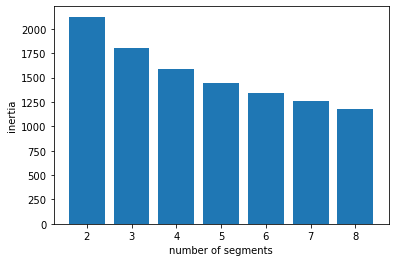

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
np.random.seed(1234)
k_values = range(2, 9)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertias.append(kmeans.inertia_)

best_k = np.argmin(inertias) + 2
best_kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=1234)
best_kmeans.fit(MD_x)

plt.bar(k_values, inertias)
plt.xlabel("number of segments")
plt.ylabel("inertia")
plt.show()

In [17]:
from sklearn.mixture import GaussianMixture

np.random.seed(1234)

X = np.array(MD_x) # Assuming MD.x is the input data

bic_scores = []
models = []

for k in range(2, 9):
    bic = []
    for _ in range(10):
        gmm = GaussianMixture(n_components=k, covariance_type='full')
        gmm.fit(X)
        bic.append(gmm.bic(X))
    bic_scores.append(np.mean(bic))
    models.append(gmm)

best_model_index = np.argmin(bic_scores)
best_model = models[best_model_index]

print(best_model)

GaussianMixture(n_components=8)


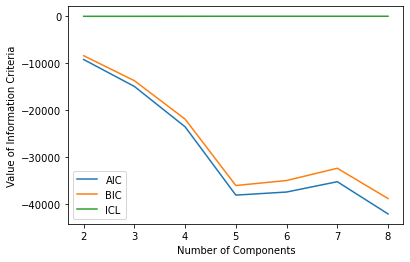

[[1 2]
 [2 0]
 [2 2]
 ...
 [2 0]
 [0 1]
 [3 2]]
[[1 0]
 [2 0]
 [2 3]
 ...
 [2 0]
 [0 3]
 [3 0]]
10.392921424998175
8.460467771769897


In [18]:

n_components = range(2, 9)
models = []
for n in n_components:
    model = GaussianMixture(n_components=n)
    model.fit(MD_x)
    models.append(model)
    
aic = [model.aic(MD_x) for model in models]
bic = [model.bic(MD_x) for model in models]
icl = [model.lower_bound_ for model in models]

plt.plot(n_components, aic, label='AIC')
plt.plot(n_components, bic, label='BIC')
plt.plot(n_components, icl, label='ICL')
plt.xlabel('Number of Components')
plt.ylabel('Value of Information Criteria')
plt.legend()
plt.show()

best_model = models[2]

kmeans = KMeans(n_clusters=4,  n_init=10)
kmeans.fit(MD_x)
kmeans_clusters = kmeans.predict(MD_x)
mixture_clusters = best_model.predict(MD_x)

table = np.column_stack((kmeans_clusters, mixture_clusters))
print(table)

mixture_model = GaussianMixture(n_components=4)
mixture_model.fit(MD_x, kmeans_clusters)

new_mixture_clusters = mixture_model.predict(MD_x)
table = np.column_stack((kmeans_clusters, new_mixture_clusters))
print(table)

log_likelihood = mixture_model.score(MD_x)
print(log_likelihood)

log_likelihood_best = best_model.score(MD_x)
print(log_likelihood_best)

Text(0.5, 1.0, 'Dendrogram')

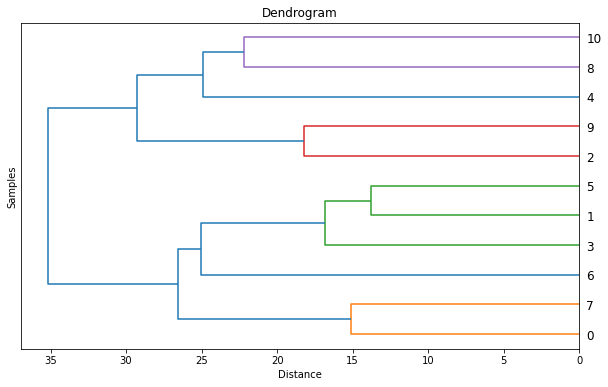

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

MD_vcluster = linkage(MD_x.T, method='complete')

plt.figure(figsize=(10, 6))
dendrogram(MD_vcluster, orientation='left')
plt.xlabel("Distance")
plt.ylabel("Samples")
plt.title("Dendrogram")

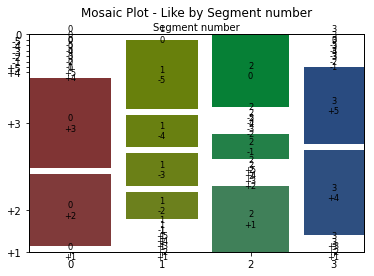

In [20]:

from statsmodels.graphics.mosaicplot import mosaic
from sklearn.tree import DecisionTreeClassifier, plot_tree

kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(mcdonalds[['Like']])
k4 = kmeans.labels_

k4_like_table = pd.crosstab(index=k4, columns=mcdonalds['Like'])
mosaic(k4_like_table.stack(), title='Mosaic Plot - Like by Segment number', gap=0.05)
plt.xlabel("Segment number")
plt.ylabel("Like")
plt.show()
     

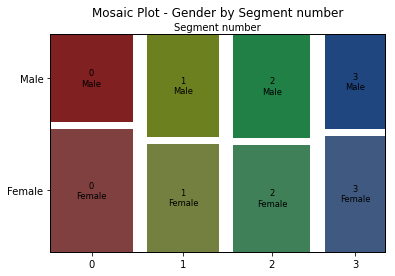

In [21]:
k4_gender_table = pd.crosstab(index=k4, columns=mcdonalds['Gender'])
mosaic(k4_gender_table.stack(), title='Mosaic Plot - Gender by Segment number', gap=0.05)
plt.xlabel("Segment number")
plt.ylabel("Gender")
plt.show()

In [22]:

mcdonalds.VisitFrequency.value_counts()

Once a month             427
Every three months       339
Once a year              252
Once a week              232
Never                    128
More than once a week     53
Name: VisitFrequency, dtype: int64

In [23]:
mcdonalds.Gender.value_counts()


Female    772
Male      659
Name: Gender, dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
mcdonalds['VisitFrequency'] = labelencoder.fit_transform(mcdonalds['VisitFrequency'])
mcdonalds['Gender'] = labelencoder.fit_transform(mcdonalds['Gender'])

In [25]:
mcdonalds['Like.n'] = mcdonalds['Like'].astype(int)
     

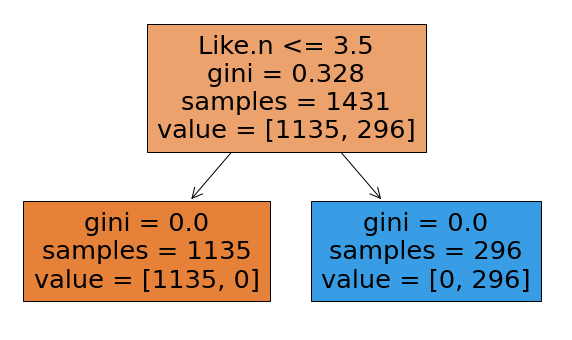

In [26]:
X = mcdonalds[['Like.n', 'Age', 'VisitFrequency', 'Gender']]
y = (k4 == 3).astype(int)

tree = DecisionTreeClassifier()
tree.fit(X, y)

plt.figure(figsize=(10, 6))
plot_tree(tree, feature_names=X.columns, filled=True)
plt.show()
     

In [27]:
visit = mcdonalds.groupby(k4)['VisitFrequency'].mean()
visit

0    2.449383
1    2.877841
2    2.441799
3    2.871622
Name: VisitFrequency, dtype: float64

In [31]:
# Compute mean values for VisitFrequency, Like.n, and Gender
visit = mcdonalds.groupby(k4)['VisitFrequency'].mean()
like = mcdonalds.groupby(k4)['Like.n'].mean()
female = mcdonalds.groupby(k4)['Gender'].apply(lambda x: np.mean((x == 'Female').astype(int)))
print(visit)
print(like)
print(female)


0    2.449383
1    2.877841
2    2.441799
3    2.871622
Name: VisitFrequency, dtype: float64
0    2.555556
1   -3.883523
2    0.248677
3    4.472973
Name: Like.n, dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
Name: Gender, dtype: float64
